In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
# sys.path.insert(0,'../../..')
# from omama import gp2
# from omama.gp2 import Runner
import gp2
from gp2 import Runner
from keras import losses, metrics
from tensorflow.keras import optimizers

/home/ryan.zurrin001/miniconda3/envs/O/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:

R = Runner(verbose=True)

*** GP2  Unet ***
Working directory: /tmp/tmpymi8omf9GP2


In [4]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/Lung_Opacity/Lung_images_final.npy')
masks = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/Lung_Opacity/Lung_masks_final.npy')

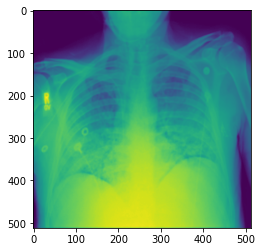

In [5]:
plt.imshow(images[500])

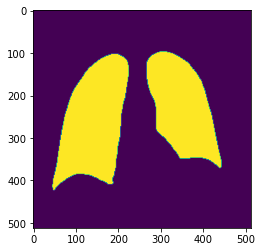

In [6]:
plt.imshow(masks[500])

In [7]:
len(images)

6012

In [8]:
len(masks)

6012

In [9]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}

In [10]:
#
#
R.setup_data(images, masks, dataset_size=6012, weights=weights)

Weights OK!


In [10]:
RUNS = 5

In [11]:
# for run in range(RUNS):
#     print('***')
#     print('RUN:', run)
#     t0 = time.time()
#     R.run_classifier()
#     R.run_discriminator()
#     R.find_machine_labels()
#     R.relabel()
#     print('TOOK', time.time()-t0, 'seconds')
R.run(images=images, masks=masks, runs=RUNS)

Weights OK!
******
Loop 1
Epoch 1/100
5/5 [==============================] - 29s 4s/step - loss: 1.5659 - dice_coeff: 0.3521 - val_loss: 1.3889 - val_dice_coeff: 0.3068
Epoch 2/100
5/5 [==============================] - 9s 2s/step - loss: 1.3396 - dice_coeff: 0.3988 - val_loss: 1.3914 - val_dice_coeff: 0.3077
Epoch 3/100
5/5 [==============================] - 9s 2s/step - loss: 1.2250 - dice_coeff: 0.4318 - val_loss: 1.3939 - val_dice_coeff: 0.3084
Epoch 4/100
5/5 [==============================] - 9s 2s/step - loss: 1.1479 - dice_coeff: 0.4584 - val_loss: 1.3965 - val_dice_coeff: 0.3083
Epoch 5/100
5/5 [==============================] - 9s 2s/step - loss: 1.1227 - dice_coeff: 0.4677 - val_loss: 1.3981 - val_dice_coeff: 0.3083
Epoch 6/100
5/5 [==============================] - 9s 2s/step - loss: 1.0708 - dice_coeff: 0.4867 - val_loss: 1.3966 - val_dice_coeff: 0.3084
Epoch 7/100
5/5 [==============================] - 9s 2s/step - loss: 1.0493 - dice_coeff: 0.4951 - val_loss: 1.3961 - va

Epoch 18/100
6/6 [==============================] - 10s 2s/step - loss: 0.8266 - dice_coeff: 0.5807 - val_loss: 1.3311 - val_dice_coeff: 0.3542
Model saved to /tmp/tmpymi8omf9GP2/unet_1.model
History saved to /tmp/tmpymi8omf9GP2/history_1.pickle
Testing the classifier...
57/57 [==============================] - 6s 103ms/step - loss: 1.3368 - dice_coeff: 0.3588
Testing the discriminator...
12/12 [==============================] - 1s 43ms/step - loss: 145.9742 - accuracy: 0.5556
Replacing 3 from 9 !
D_relabeled_ 3
point ids 3
Removed: 3 Filled: 3
TOOK 306.63051557540894 seconds
==== DONE LOOP 2 ====
******
Loop 3
Epoch 1/100
6/6 [==============================] - 17s 3s/step - loss: 0.8195 - dice_coeff: 0.5839 - val_loss: 1.2588 - val_dice_coeff: 0.4007
Epoch 2/100
6/6 [==============================] - 10s 2s/step - loss: 0.8201 - dice_coeff: 0.5838 - val_loss: 1.2800 - val_dice_coeff: 0.3790
Epoch 3/100
6/6 [==============================] - 10s 2s/step - loss: 0.8155 - dice_coeff: 0.5

In [12]:
R.classifier_scores

[[1.336902141571045, 0.2990158200263977],
 [1.3367841243743896, 0.3588433861732483],
 [1.410549521446228, 0.45529642701148987]]

In [13]:
R.discriminator_scores

[[0.0, 1.0],
 [145.97422790527344, 0.5555555820465088],
 [300.1808166503906, 0.5222222208976746]]

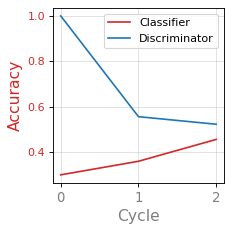

In [14]:
R.plot()

In [14]:
R.classifier_scores

[[1.2830660343170166, 0.2845652103424072],
 [0.9472792744636536, 0.49221545457839966],
 [0.9052565097808838, 0.49347877502441406],
 [0.809575080871582, 0.5901122689247131],
 [0.829034149646759, 0.6573423147201538]]

In [15]:
R.discriminator_scores

[[0.0, 1.0],
 [40.95536804199219, 0.5472221970558167],
 [41.15135192871094, 0.5333333611488342],
 [53.10768127441406, 0.5166666507720947],
 [73.3858642578125, 0.5111111402511597]]

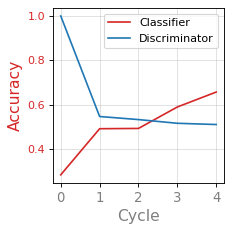

In [16]:
R.plot()